<a href="https://colab.research.google.com/github/alexander-toschev/cv-course/blob/main/FD_Line_Detection_Hough.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Edge Detection using OpenCV

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.lines as mlines

import requests
url = "https://skachatkartinki.net/photo/0-0/332_82585.jpg"
r = requests.get(url)
with open('test.jpg', 'wb') as f:
    f.write(r.content) 


url = "https://i.pinimg.com/736x/5c/ff/80/5cff802d48d74607ac929ec2751684e9--straight-lines.jpg"
r = requests.get(url)
with open('line.jpg', 'wb') as f:
    f.write(r.content) 

In [4]:
def line_detection_non_vectorized(image, edge_image, num_rhos=180, num_thetas=180, t_count=220):
  edge_height, edge_width = edge_image.shape[:2]
  edge_height_half, edge_width_half = edge_height / 2, edge_width / 2
  #
  d = np.sqrt(np.square(edge_height) + np.square(edge_width))
  dtheta = 180 / num_thetas
  drho = (2 * d) / num_rhos
  #
  thetas = np.arange(0, 180, step=dtheta)
  rhos = np.arange(-d, d, step=drho)
  #
  cos_thetas = np.cos(np.deg2rad(thetas))
  sin_thetas = np.sin(np.deg2rad(thetas))
  #
  accumulator = np.zeros((len(rhos), len(rhos)))
  #
  figure = plt.figure(figsize=(12, 12))
  subplot1 = figure.add_subplot(1, 4, 1)
  subplot1.imshow(image)
  subplot2 = figure.add_subplot(1, 4, 2)
  subplot2.imshow(edge_image, cmap="gray")
  subplot3 = figure.add_subplot(1, 4, 3)
  subplot3.set_facecolor((0, 0, 0))
  subplot4 = figure.add_subplot(1, 4, 4)
  subplot4.imshow(image)
  #
  for y in range(edge_height):
    for x in range(edge_width):
      if edge_image[y][x] != 0:
        edge_point = [y - edge_height_half, x - edge_width_half]
        ys, xs = [], []
        for theta_idx in range(len(thetas)):
          rho = (edge_point[1] * cos_thetas[theta_idx]) + (edge_point[0] * sin_thetas[theta_idx])
          theta = thetas[theta_idx]
          rho_idx = np.argmin(np.abs(rhos - rho))
          accumulator[rho_idx][theta_idx] += 1
          ys.append(rho)
          xs.append(theta)
        subplot3.plot(xs, ys, color="white", alpha=0.05)

  for y in range(accumulator.shape[0]):
    for x in range(accumulator.shape[1]):
      if accumulator[y][x] > t_count:
        rho = rhos[y]
        theta = thetas[x]
        a = np.cos(np.deg2rad(theta))
        b = np.sin(np.deg2rad(theta))
        x0 = (a * rho) + edge_width_half
        y0 = (b * rho) + edge_height_half
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        subplot3.plot([theta], [rho], marker='o', color="yellow")
        subplot4.add_line(mlines.Line2D([x1, x2], [y1, y2]))

  subplot3.invert_yaxis()
  subplot3.invert_xaxis()

  subplot1.title.set_text("Original Image")
  subplot2.title.set_text("Edge Image")
  subplot3.title.set_text("Hough Space")
  subplot4.title.set_text("Detected Lines")
  plt.show()
  return accumulator, rhos, thetas

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


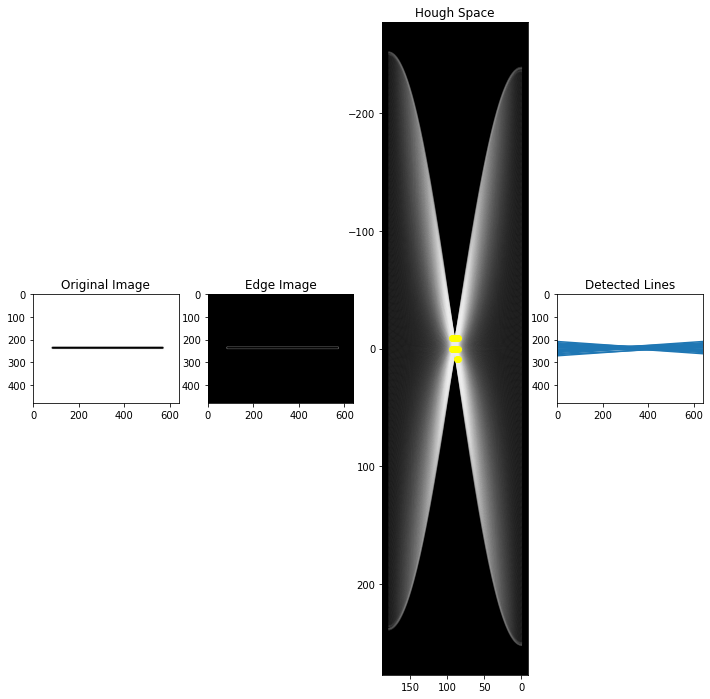

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-8.00000000e+02, -7.91111111e+02, -7.82222222e+02, -7.73333333e+02,
        -7.64444444e+02, -7.55555556e+02, -7.46666667e+02, -7.37777778e+02,
        -7.28888889e+02, -7.20000000e+02, -7.11111111e+02, -7.02222222e+02,
        -6.93333333e+02, -6.84444444e+02, -6.75555556e+02, -6.66666667e+02,
        -6.57777778e+02, -6.48888889e+02, -6.40000000e+02, -6.31111111e+02,
        -6.22222222e+02, -6.13333333e+02, -6.04444444e+02, -5.95555556e+02,
        -5.86666667e+02, -5.77777778e+02, -5.68888889e+02, -5.60000000e+02,
        -5.51111111e+02, -5.42222222e+02, -5.33333333e+02, -5.24444444e+02,
        -5.15555556e+02, -5.06666667e+02, -4.97777778e+02, -4.88888889e+02,
        -4.80000000e+02, -4.71111111e+02, -4.62222222e+02, -4.53333

In [7]:
img = cv2.imread('line.jpg')
edge_image = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
edge_image = cv2.GaussianBlur(edge_image, (3, 3), 1)
edge_image = cv2.Canny(edge_image, 100, 200)
# https://www.javatpoint.com/opencv-erosion-and-dilation
#edge_image = cv2.dilate(
#        edge_image,
#        cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5)),
#        iterations=1
#)
#edge_image = cv2.erode(
#        edge_image,
#        cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5)),
#        iterations=1
#)
line_detection_non_vectorized(img, edge_image)

## Sobel Edge Detection

Нам необходимо найти быстрые изменения интенсивности пикселей.

Syntax: dst = cv2.Sobel(src, ddepth, dx, dy, ksize)
Where, ddepth is the depth of the destination image, dx is Horizontal sobel derivative, dy is vertical sobel derivative and ksize is the kernel size.

(-0.5, 844.5, 526.5, -0.5)

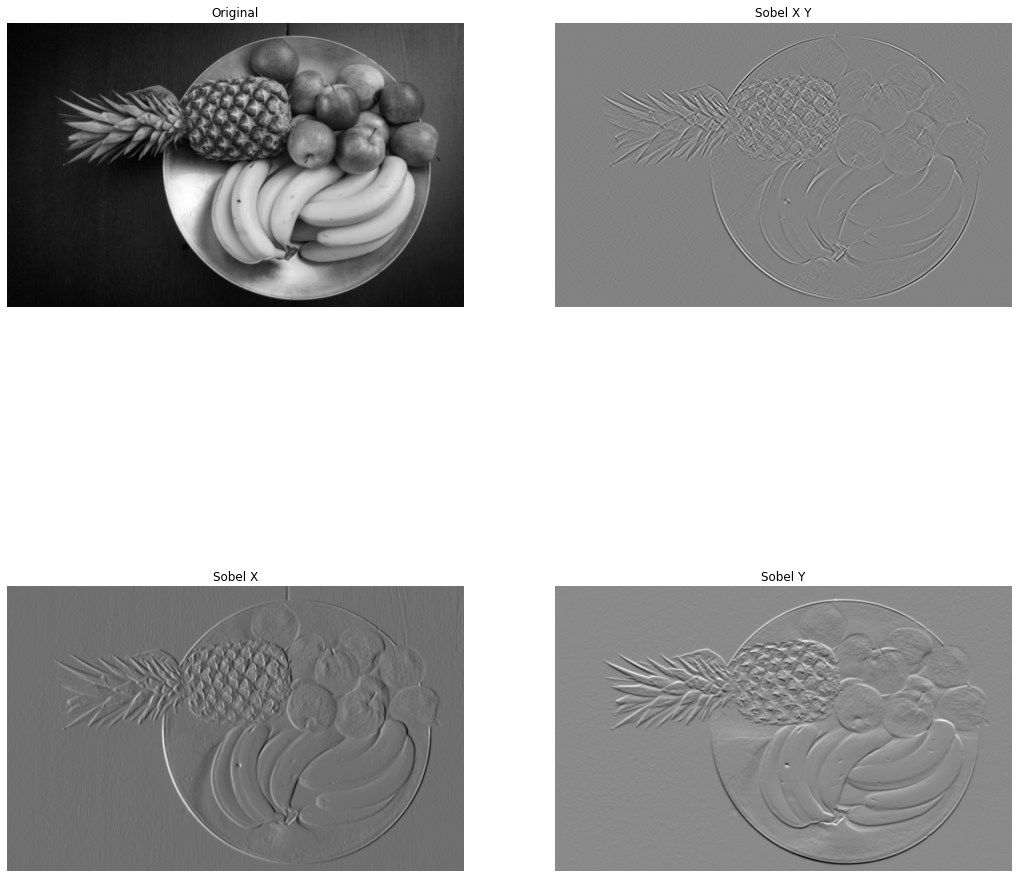

In [ ]:
sobelx = cv2.Sobel(src=img, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) 

sobely = cv2.Sobel(src=img, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5)

sobelxy = cv2.Sobel(src=img, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5)

plt.figure(figsize=(18,19))
plt.subplot(221)
plt.imshow(img, cmap='gray')
plt.title('Original') 
plt.axis("off")

plt.subplot(222)
plt.imshow(sobelxy, cmap='gray')
plt.title('Sobel X Y') 
plt.axis("off")

plt.subplot(223)
plt.imshow(sobelx, cmap='gray')
plt.title('Sobel X') 
plt.axis("off")

plt.subplot(224)
plt.imshow(sobely, cmap='gray')
plt.title('Sobel Y')
plt.axis("off")

## Canny Edge Detection

**Сглаживание**. Размытие изображения для удаления шума. Оператор Кэнни использует фильтр, который может быть хорошо приближен к первой производной гауссианы.  

$\sigma  = 1.4$:

$\displaystyle \mathbf {B} = \frac{1}{159} \begin{bmatrix}2&4&5&4&2\\4&9&12&9&4\\5&12&15&12&5\\4&9&12&9&4\\2&4&5&4&2\end{bmatrix}*A$


**Поиск градиентов**. Границы отмечаются там, где градиент изображения приобретает максимальное значение. Они могут иметь различное направление, поэтому алгоритм Кэнни использует четыре фильтра для обнаружения горизонтальных, вертикальных и диагональных ребер в размытом изображении.

${\displaystyle \mathbf {G} ={\sqrt {{\mathbf {G} _{x}}^{2}+{\mathbf {G} _{y}}^{2}}}}$

${\displaystyle \mathbf {\Theta } =\operatorname {arctg} \left({\mathbf {G} _{y} \over \mathbf {G} _{x}}\right).}$

Угол направления вектора градиента округляется и может принимать такие значения: 0, 45, 90, 135.

**Подавление немаксимумов**. Только локальные максимумы отмечаются как границы.

**Двойная пороговая фильтрация**. Потенциальные границы определяются порогами.

Трассировка области неоднозначности. Итоговые границы определяются путём подавления всех краёв, не связанных с определенными (сильными) границами.

Перед применением детектора обычно преобразуют изображение в оттенки серого, чтобы уменьшить вычислительные затраты. Этот этап характерен для многих методов обработки изображений.

Syntax: dest = cv2.canny(src, threshold1, threshold2)
Where, threshold1 is the the High threshold value of intensity gradient and threshold2 is the low threshold value of the intensity gradient.

(-0.5, 844.5, 526.5, -0.5)

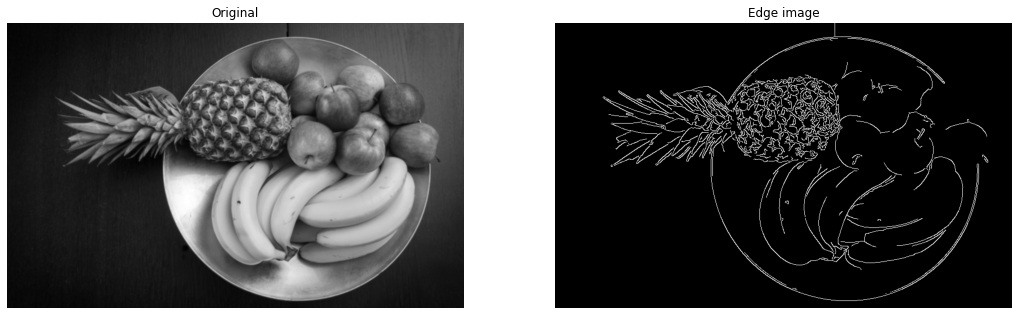

In [ ]:
edges = cv2.Canny(image=img, threshold1=100, threshold2=200)

plt.figure(figsize=(18,19))
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('Original') 
plt.axis("off")

plt.subplot(122)
plt.imshow(edges, cmap='gray')
plt.title('Edge image')
plt.axis("off")

**Задача**

Посчитайте количество объектов на картинке выше.